In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from numpy.polynomial.polynomial import polyfit

cols=['Date', 'Time', 'Open','High','Low','Last']
dfm = pd.read_csv('data/eum.csv',skipinitialspace=True, usecols=cols)
dfw = pd.read_csv('data/euw.csv',skipinitialspace=True, usecols=cols)
dfd = pd.read_csv('data/eud.csv',skipinitialspace=True, usecols=cols)
df4hr = pd.read_csv('data/eu4h.csv',skipinitialspace=True, usecols=cols)
# df1hr = pd.read_csv('data/HSI.1hr.csv',skipinitialspace=True, usecols=cols)

## Cleanup data and reduce the size of datasets

In [158]:
#reset index
def cleanup2(df):    
    df = df.tail(100)
    df.reset_index(inplace=True)        
    return df

dfm = cleanup2(dfm)
dfd = cleanup2(dfd)
dfw = cleanup2(dfw)
df4hr = cleanup2(df4hr)

df4hr.dtypes
##Add another column combining data and time for plotting later
df4hr['Datetime_col'] = df4hr['Date'] + df4hr['Time']

## Do Linear Regression

In [159]:
#Get the Linear regression
# Fit with polyfit
#b, m = polyfit(x, y, 1)

    


## Graph Plotting

Text(0.5, 1.0, '4 Hour')

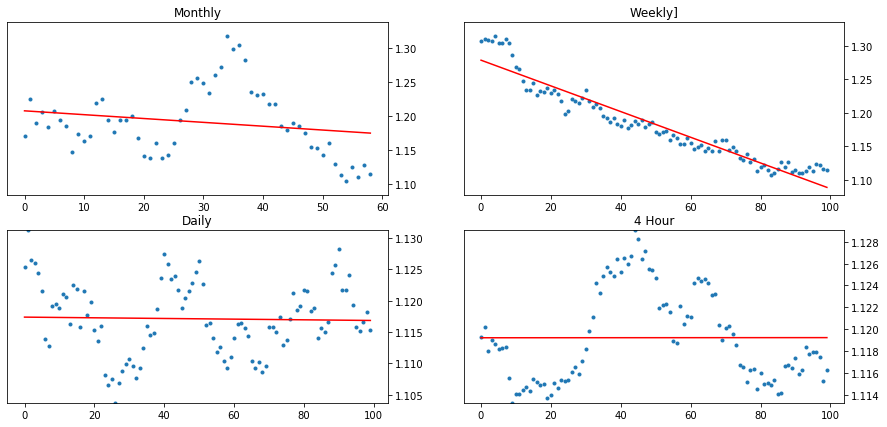

In [163]:
# fig, axs = plt.subplots(figsize=(15,7))
# axs.scatter(dfm.Date, dfm.Last)
fig, axs = plt.subplots(2, 2, figsize=(15,7))
axs[0, 0].scatter(dfm.index, dfm.Last, marker=".")
axs[0, 0].set_title('Monthly')
axs[0, 0].yaxis.tick_right()
# Fit with polyfit
b, m = polyfit(dfm.index, dfm.Last, 1)
axs[0, 0].plot(dfm.index, b + m * dfm.index, 'r-')

axs[0, 1].scatter(dfw.index, dfw.Last, marker='.')
axs[0, 1].set_title('Weekly')
axs[0, 1].yaxis.tick_right()
b, m = polyfit(dfw.index, dfw.Last, 1)
axs[0, 1].plot(dfw.index, b + m * dfw.index, 'r-')

axs[1, 0].scatter(dfd.index, dfd.Last, marker='.')
axs[1, 0].set_ylim([dfd.Last.min(), dfd.Last.max()])
axs[1, 0].set_title('Daily')
axs[1, 0].yaxis.tick_right()
b, m = polyfit(dfd.index, dfd.Last, 1)
axs[1, 0].plot(dfd.index, b + m * dfd.index, 'r-')

axs[1, 1].scatter(df4hr.index, df4hr.Last, marker='.')
axs[1, 1].set_ylim([df4hr.Last.min(), df4hr.Last.max()])
axs[1, 1].yaxis.tick_right()
b, m = polyfit(df4hr.index, df4hr.Last, 1)
axs[1, 1].plot(df4hr.index, b + m * df4hr.index, 'r-')
axs[1, 1].set_title('4 Hour')

# for ax in axs.flat:
#     ax.set(xlabel='Date', ylabel='Price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()